In [2]:
import utils_sleepasandroid as us
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
# Read in the Sleep as Android data and print some of the headers
SA_data = 'sample_data/SleepAsAndroid_data.csv'
sa_file_as_list = us.read_sleepasandroid_file(SA_data)
sa_file_as_list[0][0:15]

['Id',
 'Tz',
 'From',
 'To',
 'Sched',
 'Hours',
 'Rating',
 'Comment',
 'Framerate',
 'Snore',
 'Noise',
 'Cycles',
 'DeepSleep',
 'LenAdjust',
 'Geo']

In [22]:
# Parse the first record
ridx  = 0
split_record = us.split_sleepasandroid_record(sa_file_as_list, ridx)

# Print the awake records to get an idea of the data
split_record.awake

[['AWAKE_START', '1521283215630'],
 ['AWAKE_END', '1521283515630'],
 ['AWAKE_START', '1521287920946'],
 ['AWAKE_END', '1521288520946']]

In [21]:
split_record.light_sleep[0:6]

[['LIGHT_START', '1521266889893'],
 ['LIGHT_END', '1521267189893'],
 ['LIGHT_START', '1521268689893'],
 ['LIGHT_END', '1521269589893'],
 ['LIGHT_START', '1521270489893'],
 ['LIGHT_END', '1521271389893']]

In [10]:
split_record.deep_sleep[0:6]

[['DEEP_START', '1521267189893'],
 ['DEEP_END', '1521268689893'],
 ['DEEP_START', '1521269589893'],
 ['DEEP_END', '1521270489893'],
 ['DEEP_START', '1521271389893'],
 ['DEEP_END', '1521273789893']]

In [24]:
# remp sleep is empty on this record so nothing is displayed
split_record.rem_sleep

In [25]:
sleep_record, ls_record, ds_record, awake_record = us.parse_sleep_records(split_record)

In [26]:
sleep_record.stage

array(['LightSleep', 'DeepSleep', 'LightSleep', 'DeepSleep', 'LightSleep',
       'DeepSleep', 'LightSleep', 'DeepSleep', 'LightSleep', 'DeepSleep',
       'LightSleep', 'DeepSleep', 'LightSleep', 'DeepSleep', 'LightSleep',
       'Awake', 'DeepSleep', 'LightSleep', 'DeepSleep', 'LightSleep',
       'DeepSleep', 'LightSleep', 'Awake', 'DeepSleep', 'LightSleep'],
      dtype=object)

In [27]:
ls_record.cycle_start_ms

array([       0,  1800000,  3600000,  6900000, 11400000, 12300000,
       14400000, 15900000, 18600000, 19500000, 21000000, 23700000])

In [28]:
ls_record.cycle_end_ms

array([  300000,  2700000,  4500000, 10500000, 11700000, 13800000,
       15300000, 16500000, 18900000, 20400000, 21900000, 26878512])

In [29]:
awake_record

Awake_Record(cycle_start_ms=array([16325737, 21031053]), cycle_end_ms=array([16625737, 21631053]), cycle_duration_ms=array([300000, 600000]), ncycles=2)

In [30]:
sleep_record._fields

('ncycles', 'start_ms', 'end_ms', 'duration_ms', 'stage', 'stage_code')

In [31]:
sleep_record.start_ms

array([       0,   300000,  1800000,  2700000,  3600000,  4500000,
        6900000, 10500000, 11400000, 11700000, 12300000, 13800000,
       14400000, 15300000, 15900000, 16325737, 16500000, 18600000,
       18900000, 19500000, 20400000, 21000000, 21031053, 21900000,
       23700000])

In [32]:
sleep_record.end_ms

array([  300000,  1800000,  2700000,  3600000,  4500000,  6900000,
       10500000, 11400000, 11700000, 12300000, 13800000, 14400000,
       15300000, 15900000, 16500000, 16625737, 18600000, 18900000,
       19500000, 20400000, 21000000, 21900000, 21631053, 23700000,
       26878512])

In [34]:
heartRateData = np.array(split_record.hr)
heartRateData = np.array(heartRateData[:].T[2], dtype=float)
rHR_p5 = np.percentile(heartRateData, 5)
rHR = heartRateData.min()
print(rHR, rHR_p5)

61.40625 65.04676275


Text(30000,2.25,'Resting Heart Rate = 65')

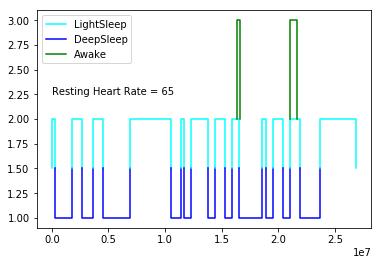

In [35]:
fig, ax = plt.subplots()
for idx in range(sleep_record.ncycles):
    start = sleep_record.start_ms[idx]
    end = sleep_record.end_ms[idx]
    x = [start, start, end, end]
    scode = sleep_record.stage_code[idx]
    
    if sleep_record.stage[idx] == 'LightSleep':
        y = [1.5, scode, scode, 1.5]
        c = 'cyan'
    elif sleep_record.stage[idx] == 'DeepSleep':
        y = [1.5, scode, scode, 1.5]
        c = 'blue'
    elif sleep_record.stage[idx] == 'Awake':
        y = [2, scode, scode, 2]
        c = 'green'
    ax.plot(x, y, color=c)
ax.plot([],[], c='cyan', label='LightSleep')
ax.plot([],[], c='blue', label='DeepSleep')
ax.plot([],[], c='green', label='Awake')
ax.legend(loc=2)
ax.text(30000, 2.25, 'Resting Heart Rate = {0}'.format(int(rHR_p5)))

# Lets iterate through the file now

In [36]:
fl_nLines = len(sa_file_as_list)
fl_nLines

175

In [38]:
idx = 0
RestingHR = []
RestingHRp5 = []
while idx < fl_nLines:
    if 'Id' in sa_file_as_list[idx]:
        split_record = us.split_sleepasandroid_record(sa_file_as_list, idx)
        if split_record:
            if split_record.hr:
                heartRateData = np.array(split_record.hr)
                heartRateData = np.array(heartRateData[:].T[2], dtype=float)
                RestingHRp5.append(int(np.percentile(heartRateData, 5)))
                RestingHR.append(int(heartRateData.min()))
    idx += 1

C:\Repositories_C\pyhealth\utils_sleepasandroid.py:40: UserWarning: manual entry found, unable to parse sleep data
  light_sleep = []
C:\Repositories_C\pyhealth\utils_sleepasandroid.py:88: UserWarning: unrecognized event: ['LOW_BATTERY', '1518789353255']
  noise, alarm]:
C:\Repositories_C\pyhealth\utils_sleepasandroid.py:88: UserWarning: unrecognized event: ['TRACKING_PAUSED', '1516371135501']
  noise, alarm]:
C:\Repositories_C\pyhealth\utils_sleepasandroid.py:88: UserWarning: unrecognized event: ['TRACKING_RESUMED', '1516371330484']
  noise, alarm]:
C:\Repositories_C\pyhealth\utils_sleepasandroid.py:88: UserWarning: unrecognized event: ['TRACKING_PAUSED', '1515938738634']
  noise, alarm]:
C:\Repositories_C\pyhealth\utils_sleepasandroid.py:88: UserWarning: unrecognized event: ['TRACKING_RESUMED', '1515938859979']
  noise, alarm]:
C:\Repositories_C\pyhealth\utils_sleepasandroid.py:88: UserWarning: unrecognized event: ['TRACKING_PAUSED', '1515592818031']
  noise, alarm]:
C:\Repositories_

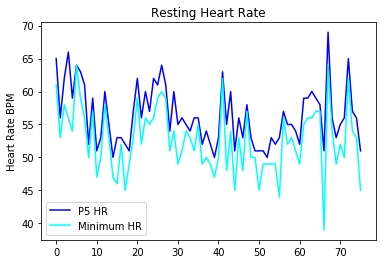

In [39]:
plt_idx = [x for x in range(len(RestingHRp5))]
fig, ax = plt.subplots()

ax.plot(plt_idx, RestingHRp5, 'blue', label='P5 HR')
ax.plot(plt_idx, RestingHR, 'cyan', label='Minimum HR')
ax.set_title('Resting Heart Rate')
ax.set_ylabel('Heart Rate BPM')
ax.legend(loc=3)